## A. Importing Modules & Datasets

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import random as rnd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
# Read CSV File to pandas dataframe
df = pd.read_csv('../reports/company_report_sorted.csv')

## B. Data Exploration

In [3]:
# first 5 rows of the dataframe
df.head(5)

,volume_tests,company_id,company_type,time,date,month,year,day,is_weekend,season,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_hrs,number_test_types,numbers_tested,followup_tests,min_commit
0,4590,1,Conference,2018-01-01,1,1,2018,Mon,0,Winter,4.183942,1,86,0,1396.48,2,2562,0,100000.0
1,35385,2,Enterprise,2018-01-01,1,1,2018,Mon,0,Winter,3.692000,4,241,0,321.92,2,2410,100,400000.0
2,167,6,Conference,2018-01-01,1,1,2018,Mon,0,Winter,3.971564,0,0,0,0.00,2,62,0,5715.0
3,0,9,Conference,2018-01-01,1,1,2018,Mon,0,Winter,0.000000,0,0,0,0.00,0,0,0,NaN
4,1792,17,Enterprise,2018-01-01,1,1,2018,Mon,0,Winter,3.989180,3,0,0,0.00,1,37,0,NaN


In [4]:
# last 5 rows of the dataframe
df.tail(5)

,volume_tests,company_id,company_type,time,date,month,year,day,is_weekend,season,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_hrs,number_test_types,numbers_tested,followup_tests,min_commit
3645,1688,1,Conference,2019-12-31,31,12,2019,Tues,0,Winter,3.924703,1,24,0,10559.88,4,290,0,58333.0
3646,36035,2,Enterprise,2019-12-31,31,12,2019,Tues,0,Winter,3.749500,62,141,30,7795.69,4,4157,37,400000.0
3647,350,6,Conference,2019-12-31,31,12,2019,Tues,0,Winter,3.944690,1,5,0,2255.97,4,157,0,5715.0
3648,7961,9,Conference,2019-12-31,31,12,2019,Tues,0,Winter,3.856766,99,0,0,2279.97,3,130,0,NaN
3649,2880,17,Enterprise,2019-12-31,31,12,2019,Tues,0,Winter,4.073990,11,0,4,264.00,1,55,0,NaN


In [5]:
# statistical summary for all numerical attributes
df.describe()

,volume_tests,company_id,date,month,year,is_weekend,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_hrs,number_test_types,numbers_tested,followup_tests,min_commit
count,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,2190.000000
mean,9120.480548,7.000000,15.720548,6.526027,2018.500000,0.284932,3.750533,8.811507,106.315890,16.197808,3006.972041,2.464658,594.316438,41.547671,156984.815982
std,15362.298132,5.762734,8.797452,3.448324,0.500069,0.451444,0.701085,27.590904,224.404677,76.418765,3005.372291,0.969519,1035.801602,107.810470,173817.536923
min,0.000000,1.000000,1.000000,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5715.000000
25%,378.000000,2.000000,8.000000,4.000000,2018.000000,0.000000,3.790459,0.000000,3.000000,0.000000,408.000000,2.000000,55.000000,0.000000,5715.000000
50%,2016.000000,6.000000,16.000000,7.000000,2018.500000,0.000000,3.869917,1.000000,23.000000,0.000000,1918.800000,3.000000,132.000000,0.000000,58333.000000
75%,6875.750000,9.000000,23.000000,10.000000,2019.000000,1.000000,3.946524,5.000000,86.000000,4.000000,5735.930000,3.000000,365.750000,30.000000,400000.000000
max,57069.000000,17.000000,31.000000,12.000000,2019.000000,1.000000,4.183942,627.000000,4474.000000,1258.000000,11711.860000,5.000000,4200.000000,2337.000000,400000.000000


In [6]:
# count frequency for is_weekend
df['is_weekend'].value_counts()

0    2610
1    1040
Name: is_weekend, dtype: int64

In [7]:
# total count for is_weekend
df['is_weekend'].count()

3650

## C. Distribution Analysis

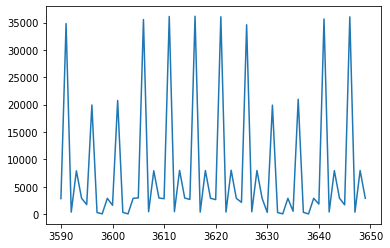

In [8]:
plt.plot(df['volume_tests'][-60:])
plt.show()

Text(0, 0.5, 'Number of tests')

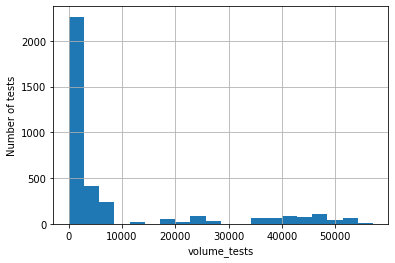

In [9]:
# histogram of volume_tests
df['volume_tests'].hist(bins=20)
plt.xlabel('volume_tests')
plt.ylabel('Number of tests')

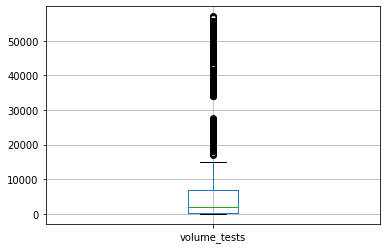

In [10]:
# boxplot of volume_tests
df.boxplot(column='volume_tests')

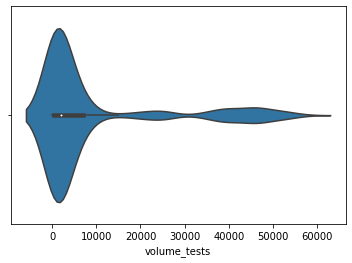

In [11]:
#Violinplot for volume_tests
sns.violinplot(x=df['volume_tests'])

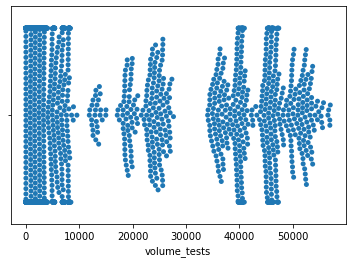

In [12]:
#Swarmplot for volume_tests
sns.swarmplot(x=df['volume_tests'])

Text(0, 0.5, 'Frequency')

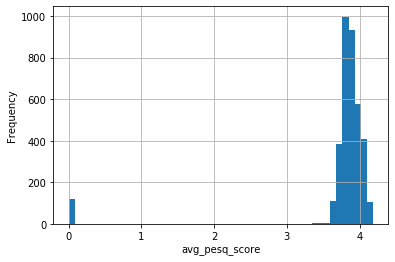

In [13]:
# histogram of avg_pesq_score
df['avg_pesq_score'].hist(bins=50)
plt.xlabel('avg_pesq_score')
plt.ylabel('Frequency')

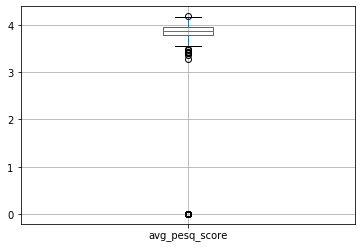

In [14]:
# boxplot of avg_pesq_score
df.boxplot(column='avg_pesq_score')

Text(0, 0.5, 'Frequency')

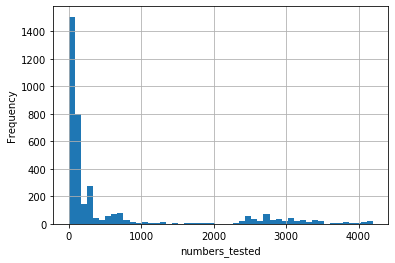

In [15]:
# histogram of numbers_tested
df['numbers_tested'].hist(bins=50)
plt.xlabel('numbers_tested')
plt.ylabel('Frequency')

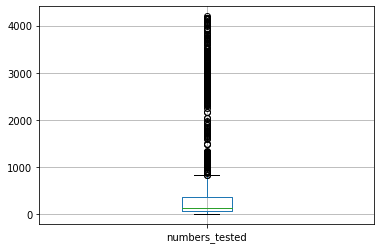

In [16]:
# boxplot of numbers_tested
df.boxplot(column='numbers_tested')

Text(0, 0.5, 'Frequency')

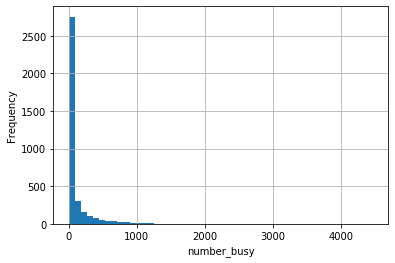

In [17]:
# histogram of number_busy
df['number_busy'].hist(bins=50)
plt.xlabel('number_busy')
plt.ylabel('Frequency')

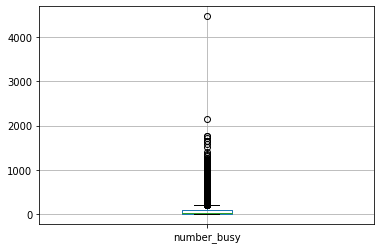

In [18]:
# boxplot of number_busy
df.boxplot(column='number_busy')

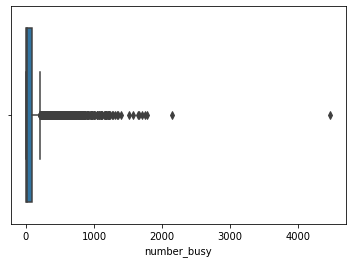

In [19]:
# seaborn-style boxpolot for number_busy
sns.boxplot(x=df['number_busy'])

Text(0.5, 0.98, '')

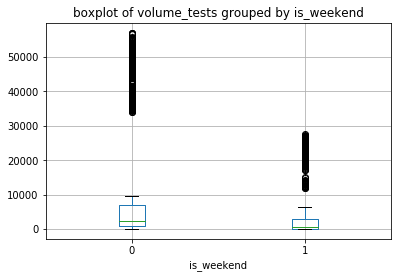

In [20]:
# boxplots of volume_tests, grouped by the categorical attribute is_weekend
df.boxplot(column='volume_tests', by='is_weekend')
plt.title('boxplot of volume_tests grouped by is_weekend')
plt.suptitle("")

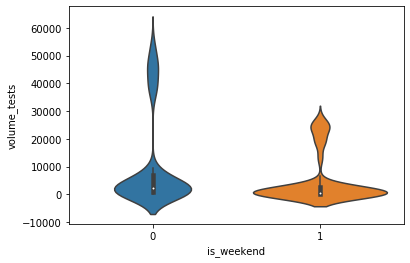

In [21]:
# violinplot of volume_tests. grouped by the categorical attribute is_weekend
sns.violinplot(x='is_weekend', y='volume_tests', data=df)

Text(0.5, 0.98, '')

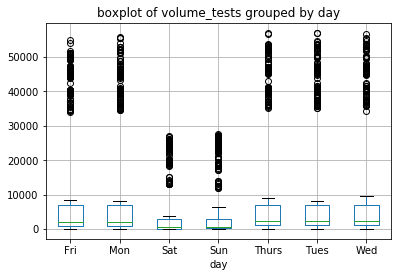

In [22]:
# boxplots of volume_tests, grouped by the categorical attribute day
df.boxplot(column='volume_tests', by='day')
plt.title('boxplot of volume_tests grouped by day')
plt.suptitle("")

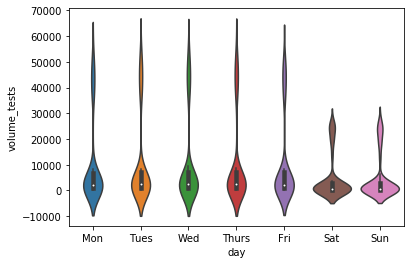

In [23]:
# violin plot of volume_tests. grouped by the categorical attribute is_weekend
sns.violinplot(x='day', y='volume_tests', data=df)

Text(0.5, 0.98, '')

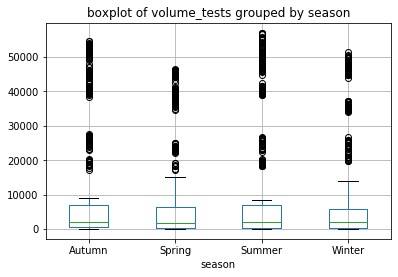

In [24]:
# boxplots of volume_tests, grouped by the categorical attribute season
df.boxplot(column='volume_tests', by='season')
plt.title('boxplot of volume_tests grouped by season')
plt.suptitle("")

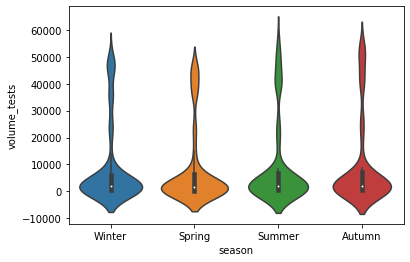

In [25]:
# violin plot of volume_tests. grouped by the categorical attribute season
sns.violinplot(x='season', y='volume_tests', data=df)

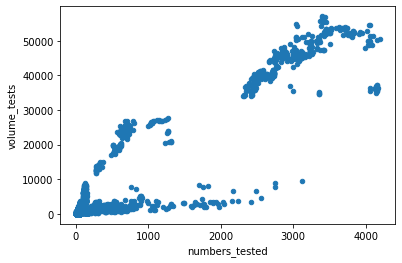

In [26]:
# Showing the relationship between numbers_tested and volume_tests
# As you can see, volume_tests tends to grow linearly when numbers_tested increases
df.plot.scatter(x='numbers_tested', y='volume_tests')

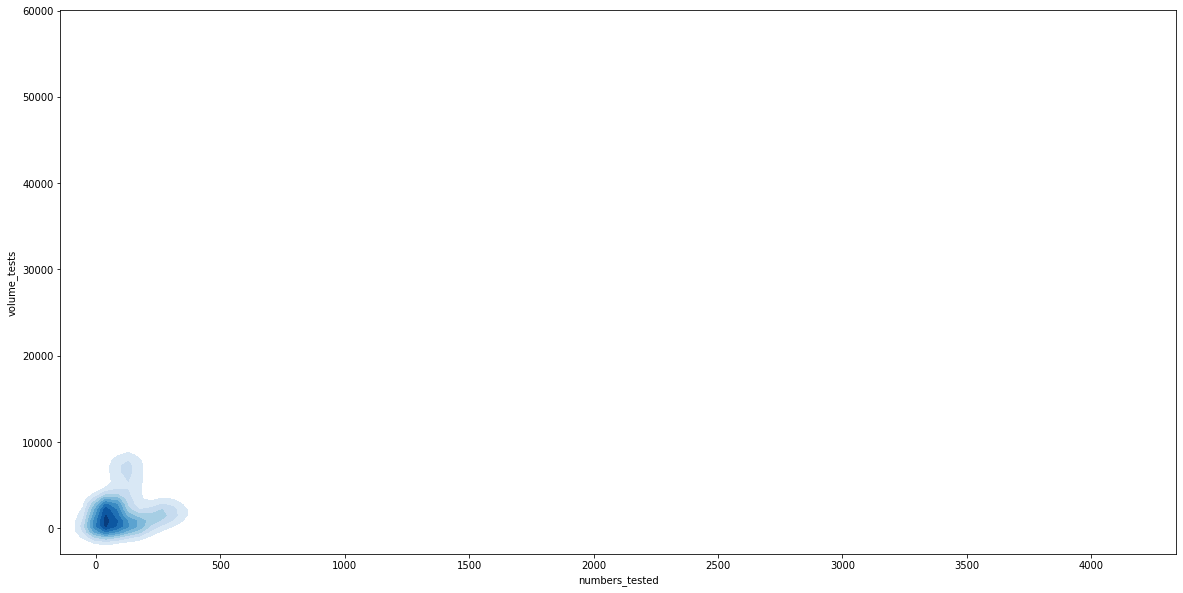

In [27]:
# kernel density estimate plot between numbers_tested and volume_tests
plt.figure(figsize=(20,10))
sns.kdeplot(df['numbers_tested'], df['volume_tests'],cmap="Blues", shade=True, shade_lowest=False)

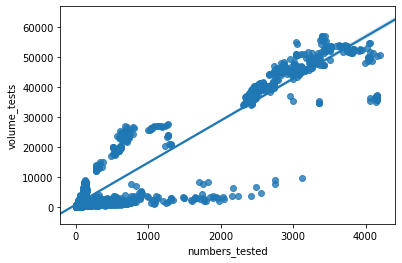

In [28]:
# linear regression plot between numbers_tested and volume_tests
sns.regplot(x='numbers_tested', y='volume_tests', data=df)

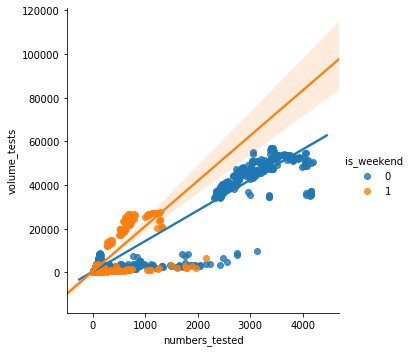

In [29]:
# regression models across conditional subsets of a dataset for a subset is_weekend
sns.lmplot(x="numbers_tested", y="volume_tests", hue="is_weekend", data=df);

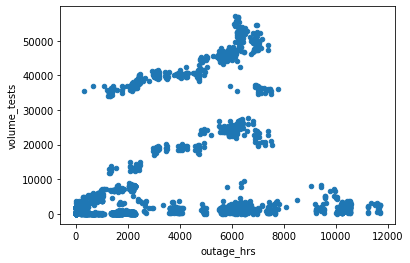

In [30]:
# Showing the relationship between outage_hrs and volume_tests
df.plot.scatter(x='outage_hrs', y='volume_tests')

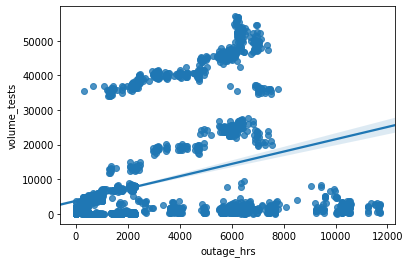

In [31]:
# linear regression plot between numbers_tested and volume_tests
sns.regplot(x='outage_hrs', y='volume_tests', data=df)

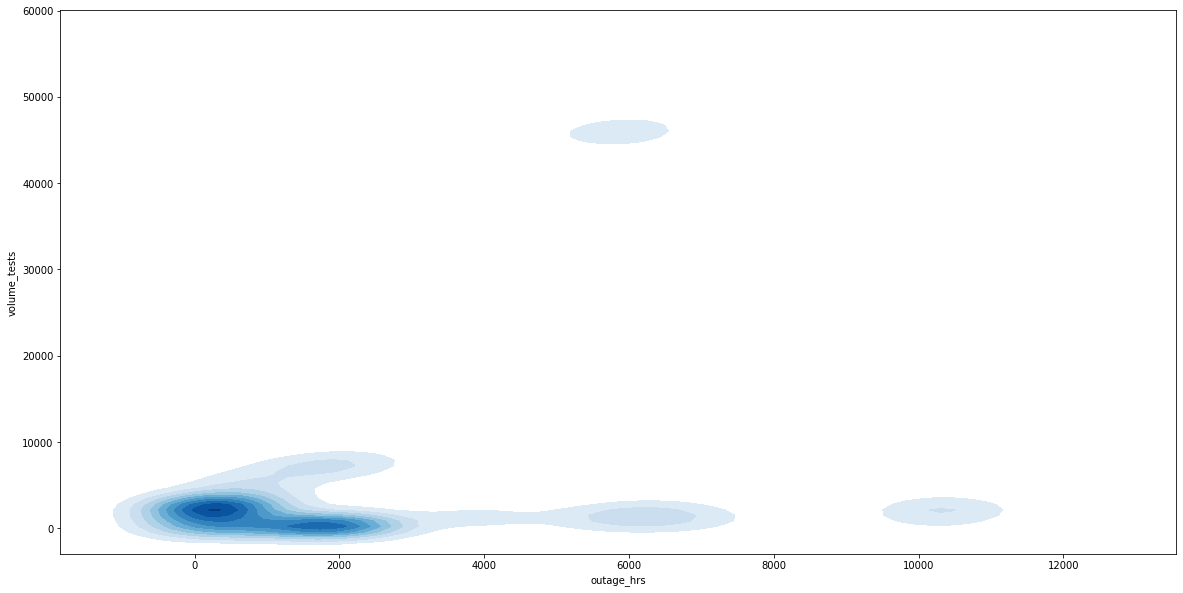

In [32]:
# kernel density estimate plot between outage_hrs and volume_tests
plt.figure(figsize=(20,10))
sns.kdeplot(df['outage_hrs'], df['volume_tests'],cmap="Blues", shade=True, shade_lowest=False)

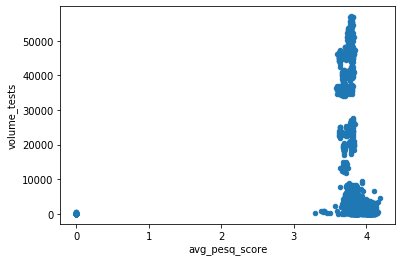

In [33]:
# Showing the relationship between avg_pesq_score and volume_tests
df.plot.scatter(x='avg_pesq_score', y='volume_tests')

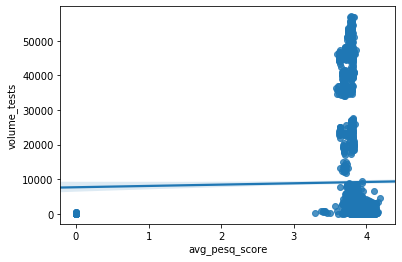

In [34]:
# linear regression plot between numbers_tested and volume_tests
sns.regplot(x='avg_pesq_score', y='volume_tests', data=df)

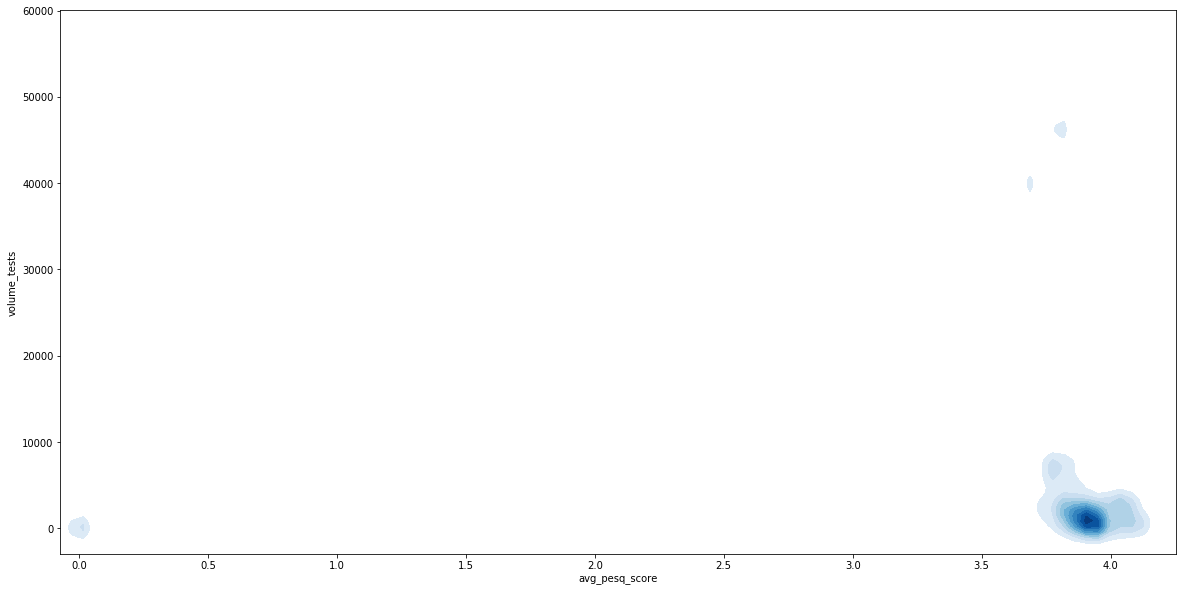

In [35]:
# kernel density estimate plot between outage_hrs and volume_tests
plt.figure(figsize=(20,10))
sns.kdeplot(df['avg_pesq_score'], df['volume_tests'],cmap="Blues", shade=True, shade_lowest=False)

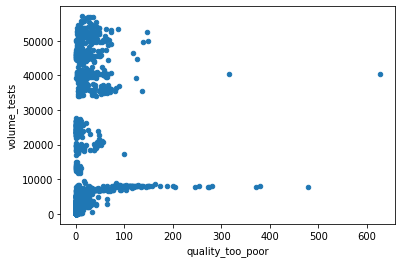

In [36]:
# Showing the relationship between avg_pesq_score and volume_tests
df.plot.scatter(x='quality_too_poor', y='volume_tests')

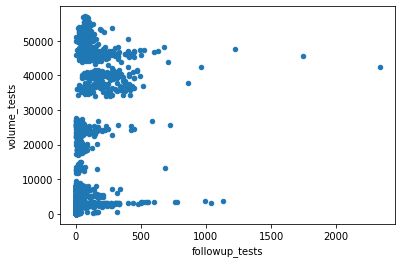

In [37]:
# Showing the relationship between followup_tests and volume_tests
df.plot.scatter(x='followup_tests', y='volume_tests')

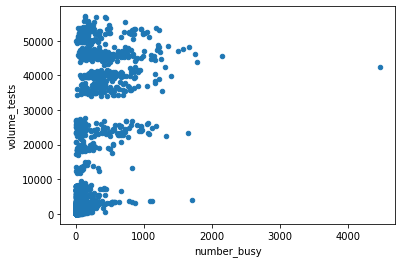

In [38]:
# Showing the relationship between number_busy and volume_tests
df.plot.scatter(x='number_busy', y='volume_tests')

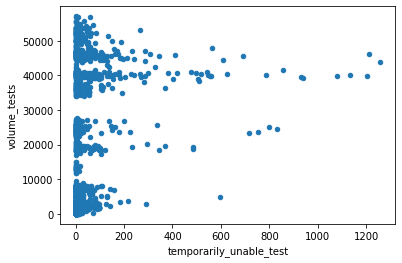

In [39]:
# Showing the relationship between temporarily_unable_test and volume_tests
df.plot.scatter(x='temporarily_unable_test', y='volume_tests')

## D. Heatmaps, Catplots, Pairplots

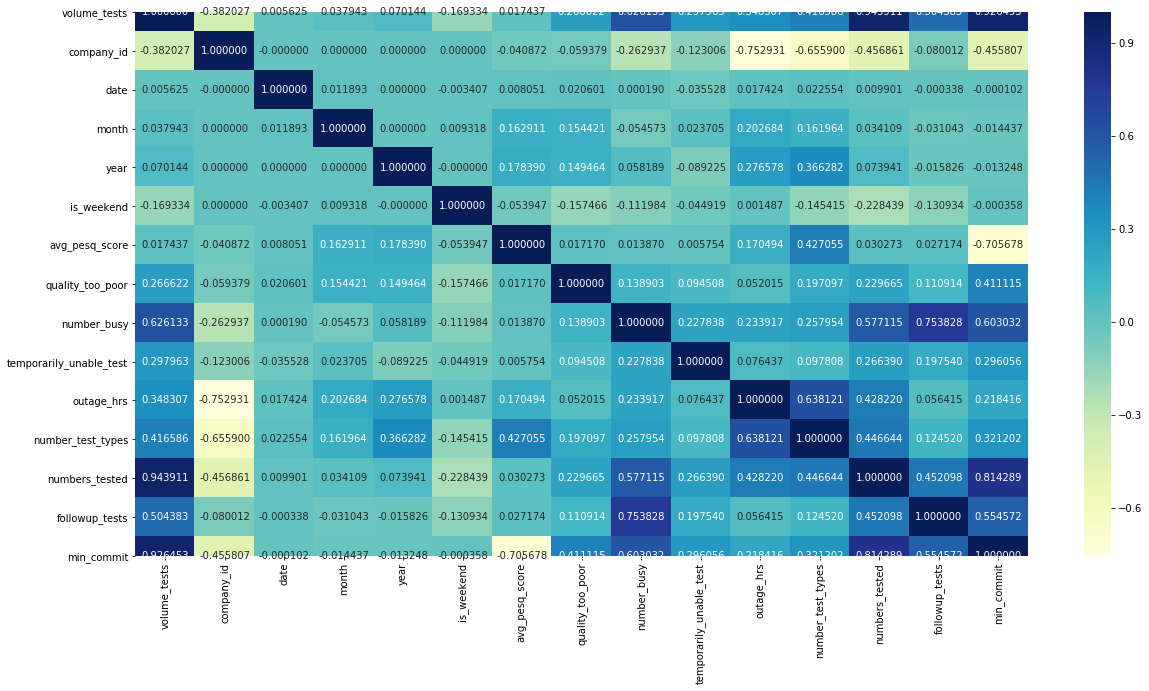

In [40]:
# color-encoded matrix
plt.figure(figsize=(20,10))
df_corr= df.corr()
sns.heatmap(df_corr, annot=True, fmt="f", cmap="YlGnBu")

<Figure size 1440x720 with 0 Axes>

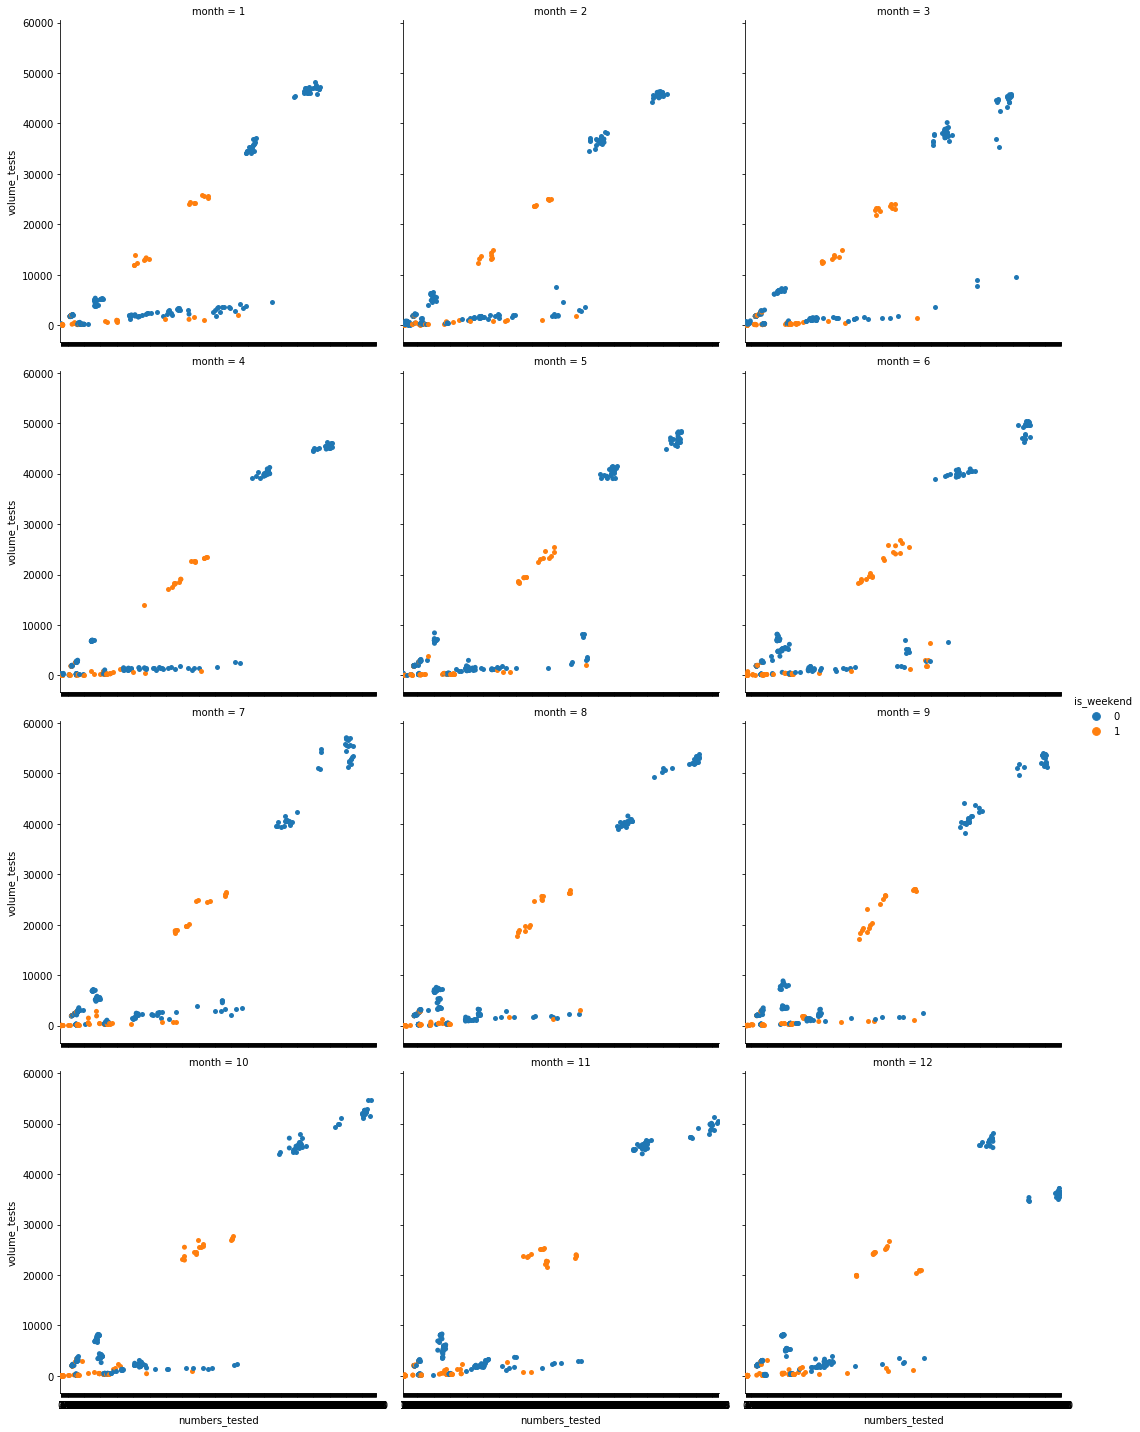

In [41]:
# catplot to show the relationship between a numerical and categorical variables
plt.figure(figsize=(20,10))
sns.catplot(x="numbers_tested", y="volume_tests", hue="is_weekend", col_wrap=3, 
            col="month",
            kind="swarm", data=df);

/home/shanebowen/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/shanebowen/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/shanebowen/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/shanebowen/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 1440x1440 with 0 Axes>

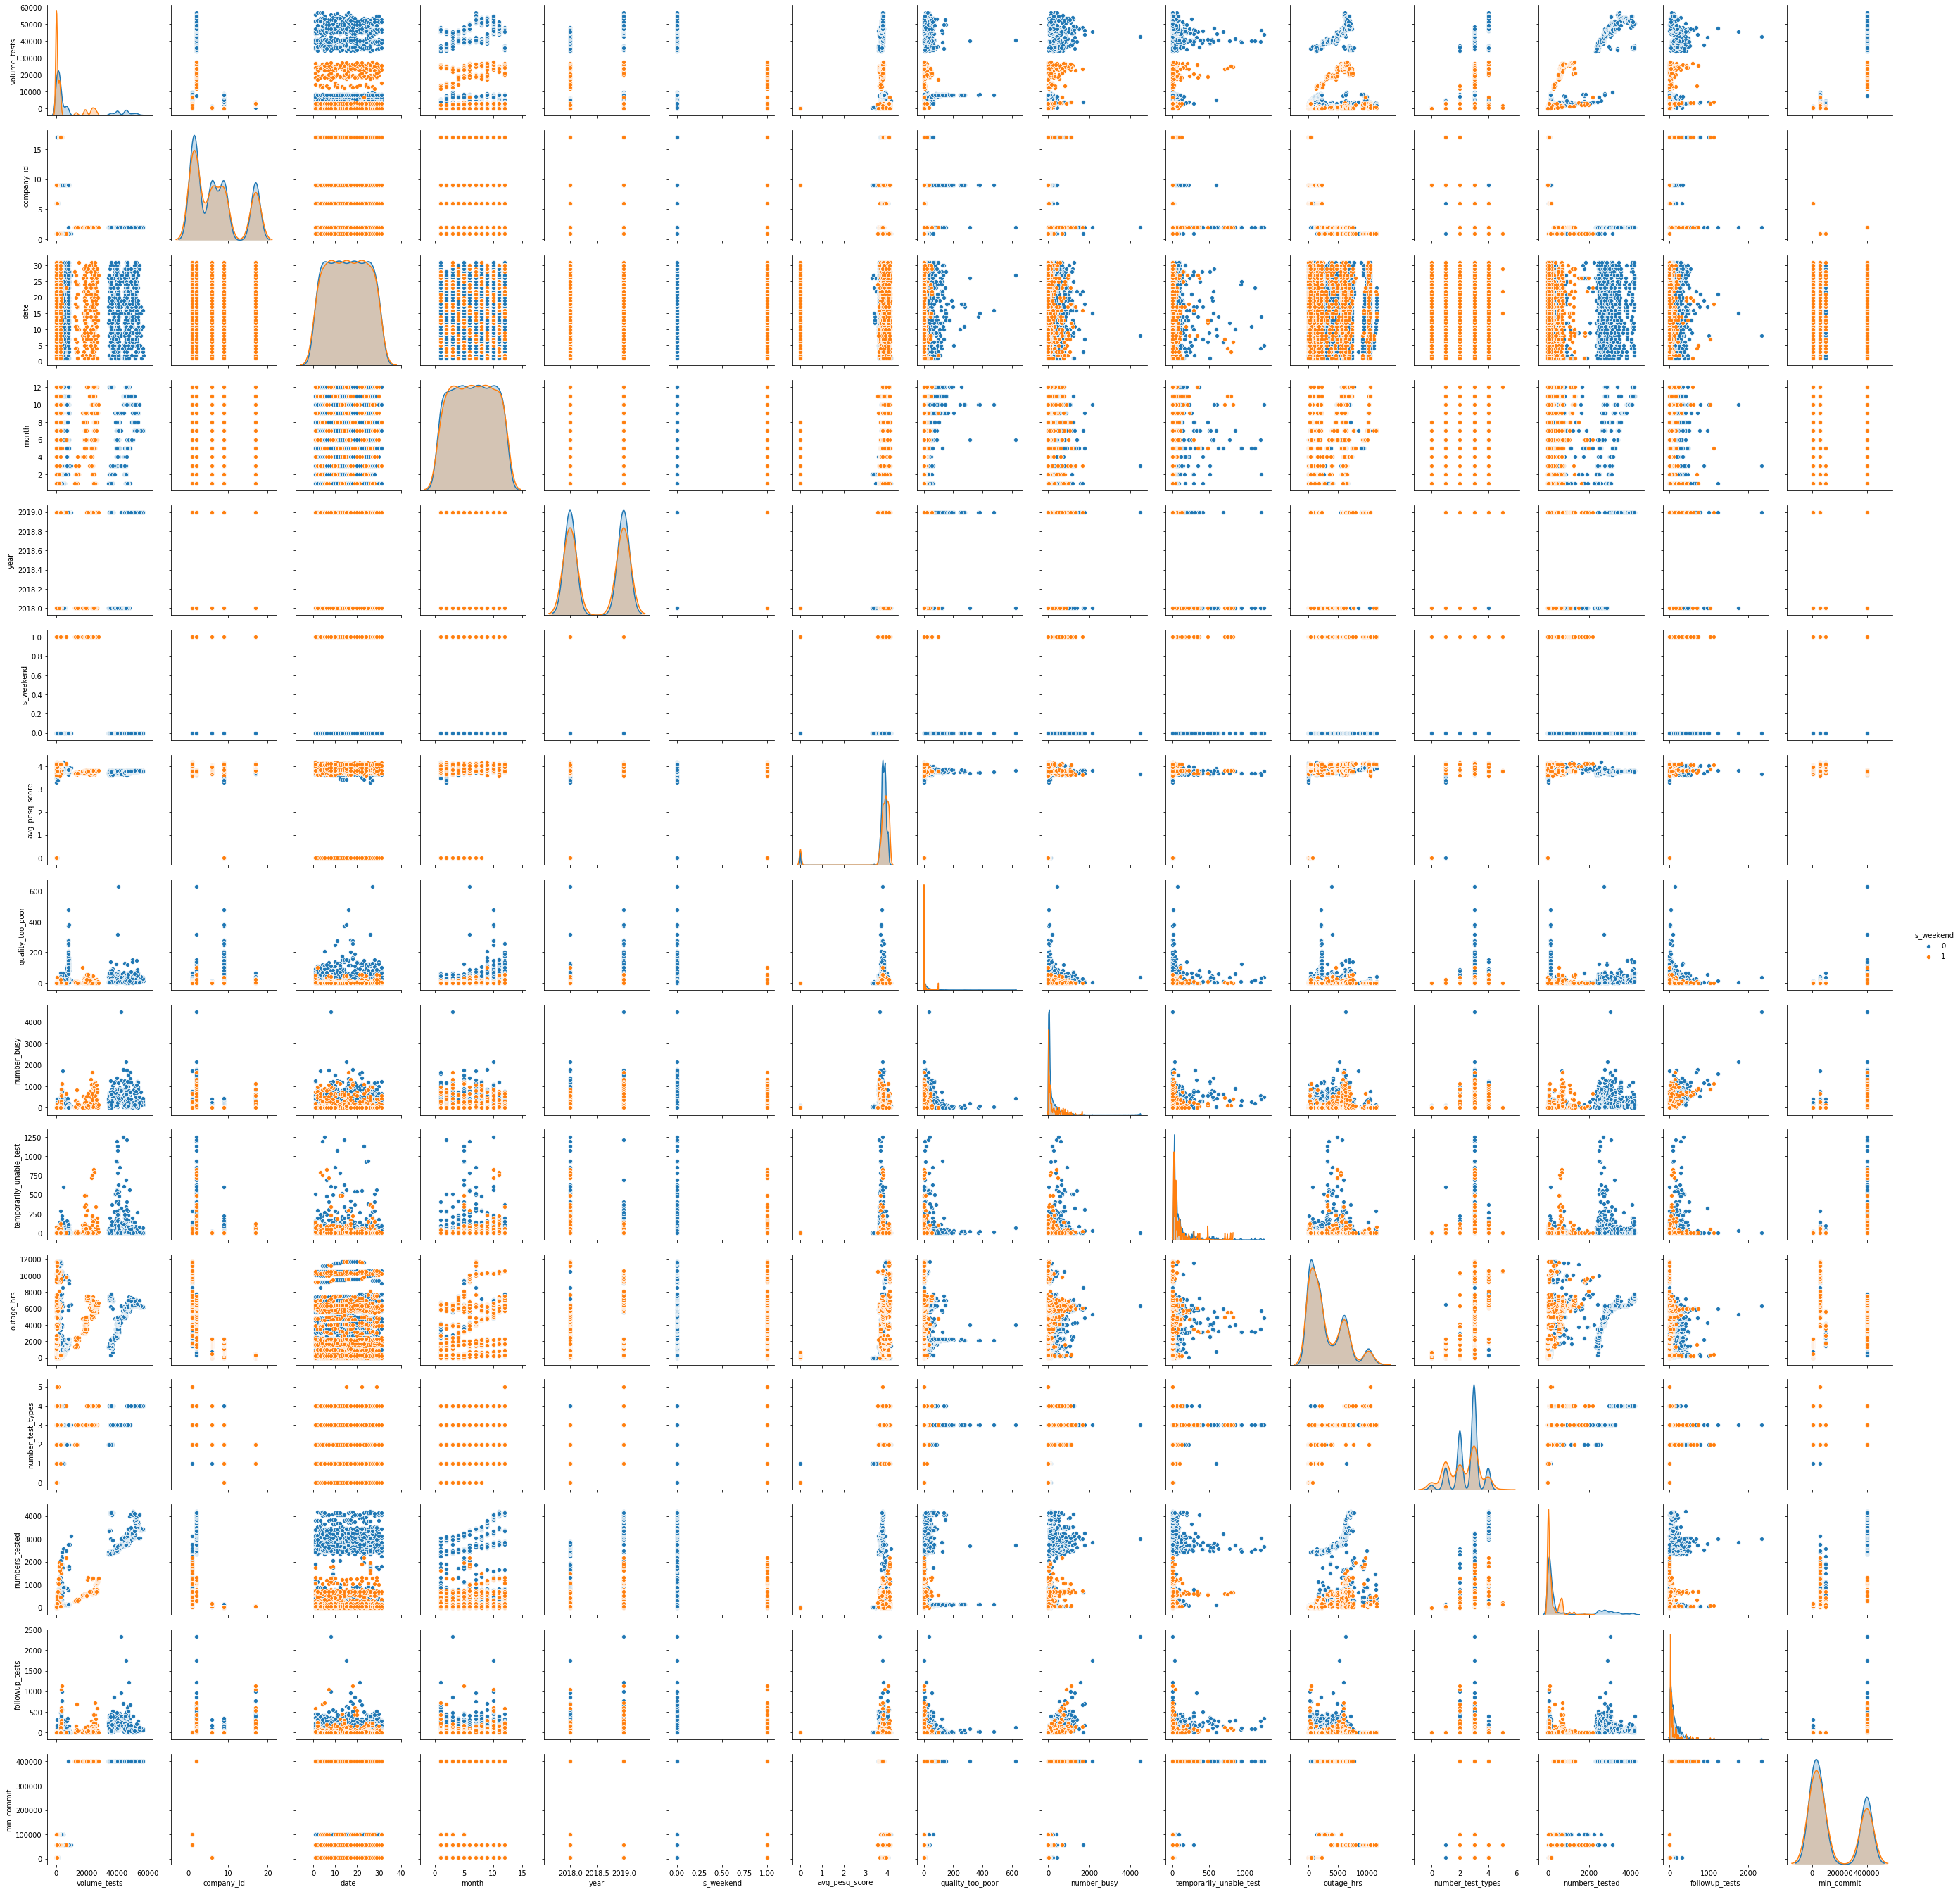

<Figure size 1440x1440 with 0 Axes>

In [42]:
# Plot pairwise relationships in a dataset.
sns.pairplot(df,hue="is_weekend");
plt.figure(figsize=(20,20))

## F. Univariate Selection, Feature Importance

In [48]:
# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

# read csv int pandas dataframe
data = pd.read_csv("../reports/company_report_sorted.csv")
X = data[['date', 'month', 'year', 'is_weekend', 'avg_pesq_score', 'number_busy', 'temporarily_unable_test', 
         'outage_hrs', 'number_test_types', 'numbers_tested', 'followup_tests']]  #independent columns
y = data['volume_tests']    #target column i.e price range

In [49]:
# Univariate Selection
# Strongest relationship with output variable

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1) #concat two dataframes for better visualization
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                      Specs         Score
7                outage_hrs  9.430380e+06
9            numbers_tested  6.542795e+06
5               number_busy  1.709776e+06
6   temporarily_unable_test  1.286551e+06
10           followup_tests  9.933650e+05
0                      date  1.192873e+04
1                     month  4.996088e+03
3                is_weekend  1.999239e+03
8         number_test_types  1.202142e+03
4            avg_pesq_score  3.834397e+02


In [ ]:
# Feature Importance
# Most important or relevant feature towards output variable
# plot graph of feature importances for better visualization

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()